In [3]:
from webscraping.scraper import fetch_all_csv_from_drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [27]:
# folder_id = "1EafyzmaIUfPRXzwt8s4TSOQcQ00U4BTF"
# credentials_path = "/Users/rahilshaik/voyager-voting-clustering/voyager-voting-clusters-3e85add6e250.json"

# df = fetch_all_csv_from_drive(folder_id, credentials_path)

# if df is not None:
#     print(df.head())

In [28]:
df = pd.read_csv("live_data.csv")

In [33]:
df.head()

,christineoh51@berkeley.edu,3,source_file,4,5,2,Unnamed: 1,1
0,lilianxu@berkeley.edu,2.0,name_196.csv,NaN,NaN,NaN,NaN,NaN
1,mayurihebbar@berkeley.edu,NaN,name_196.csv,NaN,NaN,NaN,NaN,NaN
2,shivanisahni@berkeley.edu,3.0,name_196.csv,NaN,NaN,NaN,NaN,NaN
3,annacheng@berkeley.edu,1.0,name_196.csv,NaN,NaN,NaN,NaN,NaN
4,emilyynhi@berkeley.edu,2.0,name_196.csv,NaN,NaN,NaN,NaN,NaN


In [109]:
df_tst = df
df_tst.columns = ["email", "score", "source_file", "ignore", "ignore", "ignore", "ignore", "ignore"]

In [110]:
df_tst = df_tst[["email", "score", "source_file"]]

In [111]:
df_tst= df_tst.dropna(subset=["score"]).copy()
df_agg = df_tst.groupby("email")["score"].mean().reset_index()

In [112]:
df_agg.head()

,email,score
0,adorado@berkeley.edu,3.075472
1,anjalidixit@berkeley.edu,2.947368
2,annacheng@berkeley.edu,3.000000
3,benjamin.liang@berkeley.edu,2.627451
4,brennandai@berkeley.edu,3.000000


In [113]:
scaler = StandardScaler()
df_agg["score_scaled"] = scaler.fit_transform(df_agg[["score"]])

In [114]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_agg["cluster"] = kmeans.fit_predict(df_agg[["score_scaled"]])

/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_1124/2215678203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_agg["cluster"], y=df_agg["score_scaled"], jitter=True, palette="viridis")
/var/folders/_s/gyy2hzx57s90tk86zfdrv0p40000gn/T/ipykernel_1124/2215678203.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


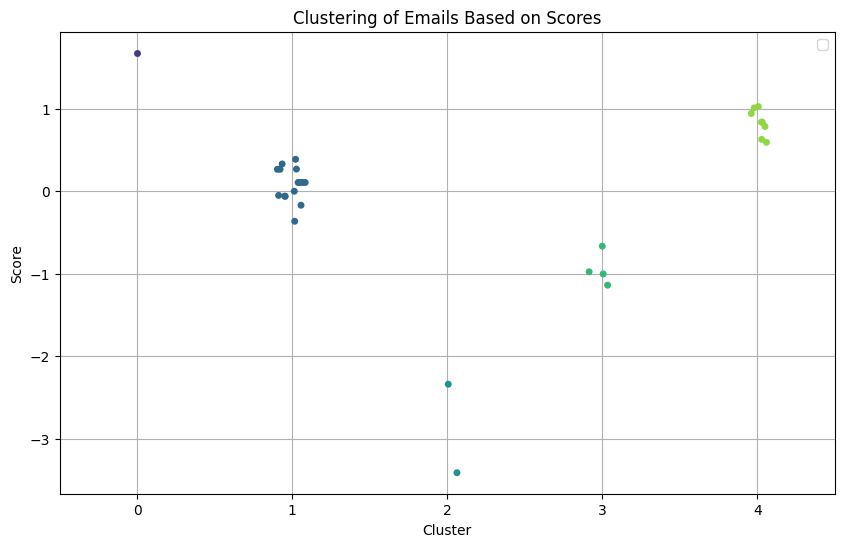

In [115]:
plt.figure(figsize=(10, 6))
sns.stripplot(x=df_agg["cluster"], y=df_agg["score_scaled"], jitter=True, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Score")
plt.title("Clustering of Emails Based on Scores")
plt.legend()
plt.grid()
plt.show()

In [150]:
df_agg.query("cluster == 2")["email"]

11    leonardo.soffiatti@berkeley.edu
25            samclement@berkeley.edu
Name: email, dtype: object

In [117]:
df_pivot = df.pivot_table(index="email", columns="source_file", values="score", aggfunc="mean")
correlation_matrix = df_pivot.corr(method="pearson", min_periods=1) 
correlation_matrix.head()

source_file,name_103.csv,name_106.csv,name_113.csv,name_114.csv,name_116.csv,name_117.csv,name_119.csv,name_122.csv,name_123.csv,name_126.csv,...,name_51.csv,name_52.csv,name_54.csv,name_61.csv,name_67.csv,name_68.csv,name_7.csv,name_71.csv,name_78.csv,name_92.csv
source_file,,,,,,,,,,,,,,,,,,,,,
name_103.csv,1.000000,0.100560,0.319628,0.314672,-0.236639,0.324192,0.020339,0.059924,0.306571,0.052033,...,-0.476731,0.052334,-0.036761,0.195115,1.257788e-01,-0.085890,0.268181,0.044622,0.087437,0.296594
name_106.csv,0.100560,1.000000,0.203040,0.416128,0.100338,0.333359,0.275494,0.375470,0.244236,-0.039369,...,0.020628,0.491854,0.146821,-0.016964,1.110875e-01,0.237319,0.099627,-0.200096,0.248999,0.511682
name_113.csv,0.319628,0.203040,1.000000,0.520031,0.116450,0.377168,0.390434,0.306698,0.477918,0.138573,...,0.249243,0.150803,-0.084841,0.451068,3.505142e-01,-0.089171,0.237719,-0.019633,0.398041,0.319835
name_114.csv,0.314672,0.416128,0.520031,1.000000,0.172659,0.390887,0.645387,0.443358,0.470599,0.308833,...,0.341107,0.362135,-0.022016,0.096936,2.188141e-01,0.138955,0.307802,0.023734,0.352562,0.442893
name_116.csv,-0.236639,0.100338,0.116450,0.172659,1.000000,0.057983,0.487857,0.254223,0.033497,0.024730,...,0.483057,0.198397,0.227207,-0.051282,8.224733e-17,0.123609,-0.012645,0.071118,0.047106,0.145575


In [185]:
df_agg.head()

,email,score,score_scaled,cluster
0,adorado@berkeley.edu,3.075472,0.329245,1
1,anjalidixit@berkeley.edu,2.947368,-0.051821,1
2,annacheng@berkeley.edu,3.000000,0.104741,1
3,benjamin.liang@berkeley.edu,2.627451,-1.003472,3
4,brennandai@berkeley.edu,3.000000,0.104741,1


In [154]:
df_tst.query("email == 'leonardo.soffiatti@berkeley.edu'")["score"].mode()

0    1.0
Name: score, dtype: float64